In [52]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [53]:
import konlpy
from konlpy.tag import Okt
from konlpy.tag import Mecab

In [54]:
# import os
# os.environ['JAVA_HOME'] = '/path/to/java/home'
# tokenizer = Okt()
tokenizer = Mecab('/opt/homebrew/lib/mecab/dic/mecab-ko-dic')

In [55]:
text = '함께 탐험하며 성장하는 AI 학교 AIFFEL'
tokenizer.morphs(text)

['함께', '탐험', '하', '며', '성장', '하', '는', 'AI', '학교', 'AIFFEL']

In [56]:
tokenizer.nouns(text)

['탐험', '성장', '학교']

In [57]:
tokenizer.pos(text)

[('함께', 'MAG'),
 ('탐험', 'NNG'),
 ('하', 'XSV'),
 ('며', 'EC'),
 ('성장', 'NNG'),
 ('하', 'XSV'),
 ('는', 'ETM'),
 ('AI', 'SL'),
 ('학교', 'NNG'),
 ('AIFFEL', 'SL')]

In [58]:
# CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [59]:
words = tokenizer.morphs(text)

In [60]:
vect.fit(words)

CountVectorizer()

In [61]:
vect.get_feature_names_out()

array(['ai', 'aiffel', '성장', '탐험', '학교', '함께'], dtype=object)

In [62]:
vect.vocabulary_

{'함께': 5, '탐험': 3, '성장': 2, 'ai': 0, '학교': 4, 'aiffel': 1}

In [63]:
len(vect.vocabulary_)

6

In [64]:
df_t = vect.transform(words)

In [65]:
df_t.toarray()

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0]])

In [66]:
pd.DataFrame(df_t.toarray(), columns=vect.get_feature_names_out())

,ai,aiffel,성장,탐험,학교,함께
0,0,0,0,0,0,1
1,0,0,0,1,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,1,0,0,0
5,0,0,0,0,0,0
6,0,0,0,0,0,0
7,1,0,0,0,0,0
8,0,0,0,0,1,0
9,0,1,0,0,0,0


In [67]:
test = 'AI 공부하며 함께 성장해요~'

In [68]:
words =tokenizer.morphs(test)
words

['AI', '공부', '하', '며', '함께', '성장', '해요', '~']

In [69]:
test_t = vect.transform(words)
test_t.toarray()

array([[1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [70]:
pd.DataFrame(test_t.toarray(), columns=vect.get_feature_names_out())

,ai,aiffel,성장,탐험,학교,함께
0,1,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,1
5,0,0,1,0,0,0
6,0,0,0,0,0,0
7,0,0,0,0,0,0


In [71]:
# TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
words = tokenizer.morphs(text)
vect.fit(words)
vect.vocabulary_

{'함께': 5, '탐험': 3, '성장': 2, 'ai': 0, '학교': 4, 'aiffel': 1}

In [72]:
vect.transform(words).toarray()

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.]])

In [73]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", sep="\t")

In [74]:
df

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [75]:
df.shape

(150000, 3)

In [76]:
df['label'].value_counts()

label
0    75173
1    74827
Name: count, dtype: int64

In [77]:
df.isnull().sum()

id          0
document    5
label       0
dtype: int64

In [78]:
df.dropna(inplace=True)

In [79]:
df.isnull().sum()

id          0
document    0
label       0
dtype: int64

In [80]:
df['len'] = df['document'].apply(len)
df

,id,document,label,len
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,19
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,33
2,10265843,너무재밓었다그래서보는것을추천한다,0,17
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,29
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,61
...,...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0,19
149996,8549745,평점이 너무 낮아서...,1,13
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0,31
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1,27


<Axes: ylabel='Frequency'>

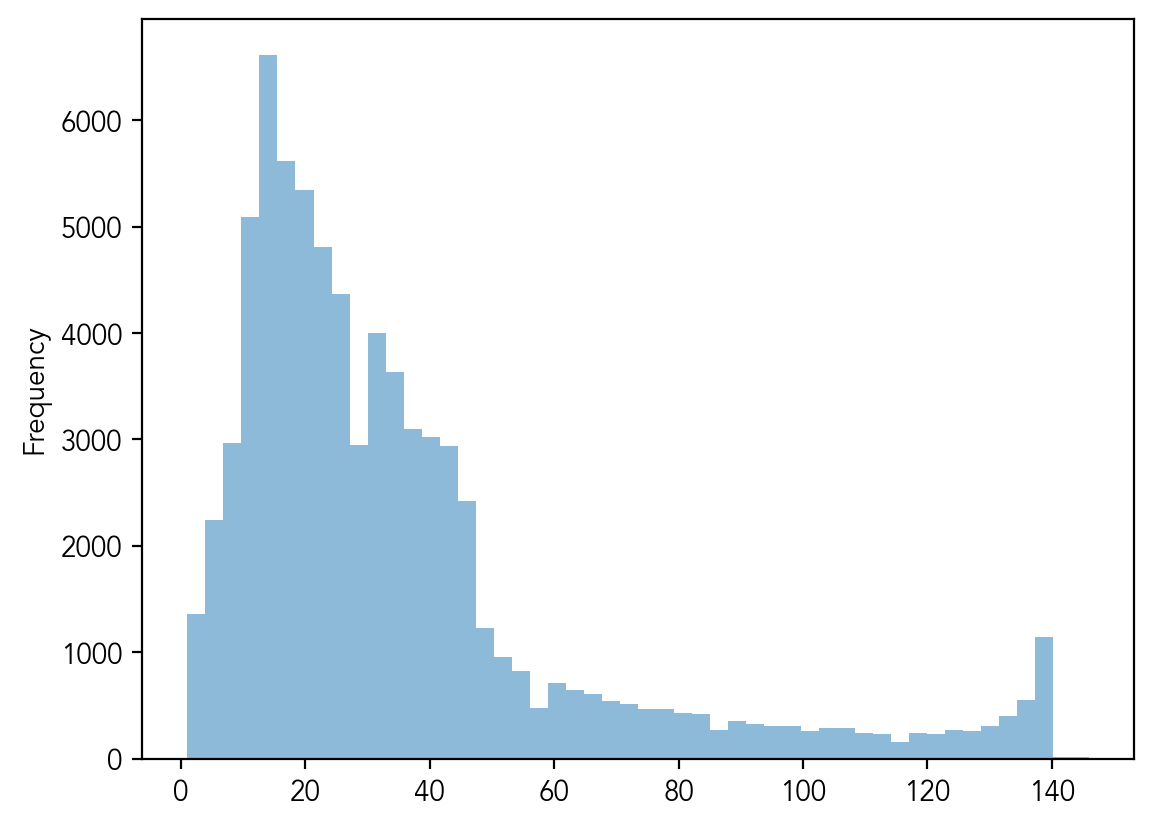

In [81]:
import matplotlib.pyplot as plt
df[df.label == 0]['len'].plot(kind='hist', alpha=0.5, bins=50, label='0')

<Axes: ylabel='Frequency'>

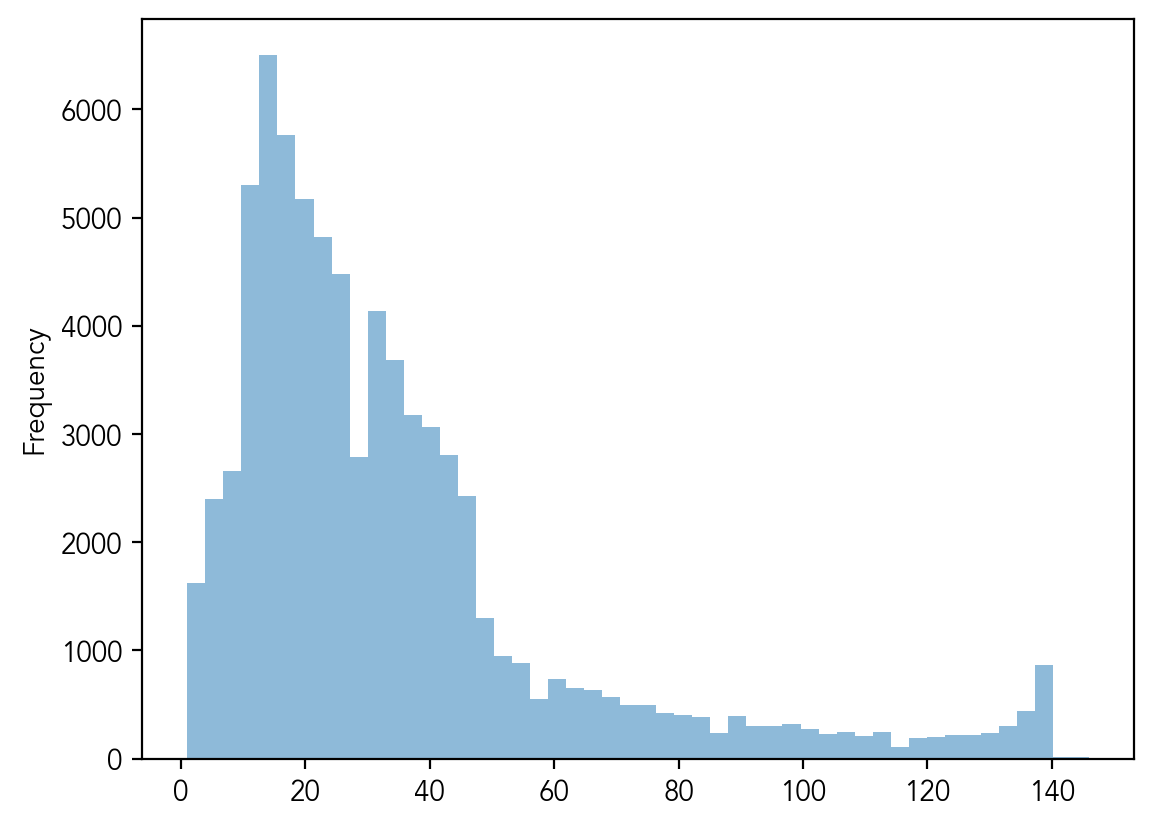

In [82]:
df[df.label == 1]['len'].plot(kind='hist', alpha=0.5, bins=50, label='0')

In [83]:
df = df[:1000]
df.shape

(1000, 4)

In [84]:
vect = CountVectorizer(tokenizer = tokenizer.morphs)
vectors = vect.fit_transform(df['document'])

In [85]:
from matplotlib.pylab import rand
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=2022)
cross_val_score(model, vectors, df['label'], scoring='f1', cv=5).mean()

0.6989417989417989

In [86]:

import konlpy
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd

# 데이터 불러오기
df = pd.read_csv("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", sep="\t")
df = df[:1000]

# 형태소 분석기 지정
tokenizer = Mecab('/opt/homebrew/lib/mecab/dic/mecab-ko-dic')

# 결측치 제거
df.dropna(inplace=True)

# 문자열 백터화 (CountVectorizer)
vect = CountVectorizer(tokenizer = tokenizer.morphs)
vectors = vect.fit_transform(df['document'])

# 모델 정의 및 훈련
model = RandomForestClassifier(random_state=2022, n_jobs=-1)
cross_val_score(model, vectors, df['label'], scoring='f1', cv=5).mean()

0.6989417989417989

In [87]:
!pip install git+https://github.com/jungin500/py-hanspell

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/jungin500/py-hanspell to /private/var/folders/b9/d_8nll_s47g6w2x0spndwwl80000gn/T/pip-req-build-ezkpqf9b
  Running command git clone --filter=blob:none --quiet https://github.com/jungin500/py-hanspell /private/var/folders/b9/d_8nll_s47g6w2x0spndwwl80000gn/T/pip-req-build-ezkpqf9b
  Resolved https://github.com/jungin500/py-hanspell to commit 9cf4ce38a8d259b92dc8af3f35d7c2442e130180
  Preparing metadata (setup.py) ... done

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [88]:
vect = CountVectorizer(tokenizer = tokenizer.morphs, max_df = 10)
vectors = vect.fit_transform(df['document'])
model = RandomForestClassifier(random_state=2022, n_jobs=-1)
cross_val_score(model, vectors, df['label'], scoring='accuracy', cv=5).mean()

0.6379999999999999

In [89]:
vect = CountVectorizer(tokenizer = tokenizer.morphs, max_df = 2)
vectors = vect.fit_transform(df['document'])
model = RandomForestClassifier(random_state=2022, n_jobs=-1)
cross_val_score(model, vectors, df['label'], scoring='accuracy', cv=5).mean()

0.5509999999999999

In [90]:
text = '함께 탐험하며 성장하는 AI 학교 AIFFEL'
stop_words = ['하며', 'ai']
vect = CountVectorizer(stop_words = stop_words)
words = tokenizer.morphs(text)
vect.fit(words)
vect.vocabulary_

{'함께': 4, '탐험': 2, '성장': 1, '학교': 3, 'aiffel': 0}

In [91]:
pip install git+https://github.com/haven-jeon/PyKoSpacing.git

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /private/var/folders/b9/d_8nll_s47g6w2x0spndwwl80000gn/T/pip-req-build-rzatf6f0
  Running command git clone --filter=blob:none --quiet https://github.com/haven-jeon/PyKoSpacing.git /private/var/folders/b9/d_8nll_s47g6w2x0spndwwl80000gn/T/pip-req-build-rzatf6f0
  Resolved https://github.com/haven-jeon/PyKoSpacing.git to commit 04aeebcbe26b109486a642e57dc58665c4818cf3
  Preparing metadata (setup.py) ... done

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [92]:
from pykospacing import Spacing
spacing = Spacing()
test = '함께탐험하며성장하는AI학교AIFFEL'
spacing(test)

'함께 탐험하며 성장하는 AI 학교 AIFFEL'

In [93]:
pip install soynlp

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [94]:
from soynlp.normalizer import *
emoticon_normalize('하하하하하하하핰ㅋㅋㅋㅋ호호호호호호홓ㅋㅋㅋㅋ', num_repeats=2)

'하하ㅋㅋ호호ㅋㅋ'

In [95]:
pip install py-hanspell

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [96]:
!pip install git+https://github.com/ssut/py-hanspell.git

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/ssut/py-hanspell.git to /private/var/folders/b9/d_8nll_s47g6w2x0spndwwl80000gn/T/pip-req-build-e0ypy9hb
  Running command git clone --filter=blob:none --quiet https://github.com/ssut/py-hanspell.git /private/var/folders/b9/d_8nll_s47g6w2x0spndwwl80000gn/T/pip-req-build-e0ypy9hb
  Resolved https://github.com/ssut/py-hanspell.git to commit fdc6ca50c19f1c85971437a072d89d4e5ce024b8
  Preparing metadata (setup.py) ... done

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [97]:
from hanspell import spell_checker
text = '사생활치매. 안핵갈려요. 뺑손이사고. 권투를 빈다. 설흔 즈음에. 문안한 스타일. 거북암이 들다. 마음이 절여온다. 골이따분한 성격. 노력이 숲으로 돌아가다. 일해라 절해라 하지 마세요.'
spell_checker.check(text)

Checked(result=True, original='사생활치매. 안핵갈려요. 뺑손이사고. 권투를 빈다. 설흔 즈음에. 문안한 스타일. 거북암이 들다. 마음이 절여온다. 골이따분한 성격. 노력이 숲으로 돌아가다. 일해라 절해라 하지 마세요.', checked='사생활 침해. 안핵 갈려요. 뺑손이사고. 건투를 빈다. 서른 즈음에. 무난한 스타일. 거북임이 들다. 마음이 절여온다. 골이 따분한 성격. 노력이 숲으로 돌아가다. 이래라저래라 하지 마세요.', errors=9, words=OrderedDict([('사생활', 1), ('침해.', 1), ('안핵', 2), ('갈려요.', 2), ('뺑손이사고.', 3), ('건투를', 1), ('빈다.', 1), ('서른', 1), ('즈음에.', 0), ('무난한', 1), ('스타일.', 1), ('거북임이', 4), ('들다.', 0), ('마음이', 0), ('절여온다.', 0), ('골이', 2), ('따분한', 2), ('성격.', 0), ('노력이', 0), ('숲으로', 0), ('돌아가다.', 0), ('이래라저래라', 1), ('하지', 0), ('마세요.', 0)]), time=0.9072489738464355)

In [98]:

import konlpy
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd

# 데이터 불러오기
df = pd.read_csv("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", sep="\t")
df = df[:1000]

# 형태소 분석기 지정
tokenizer = Mecab('/opt/homebrew/lib/mecab/dic/mecab-ko-dic')

# 결측치 제거
df.dropna(inplace=True)

# 문자열 백터화 (CountVectorizer)
vect = CountVectorizer(tokenizer = tokenizer.morphs)
vectors = vect.fit_transform(df['document'])

# 모델 정의 및 훈련
model = RandomForestClassifier(random_state=2022, n_jobs=-1)
cross_val_score(model, vectors, df['label'], scoring='f1', cv=5).mean()

0.6989417989417989

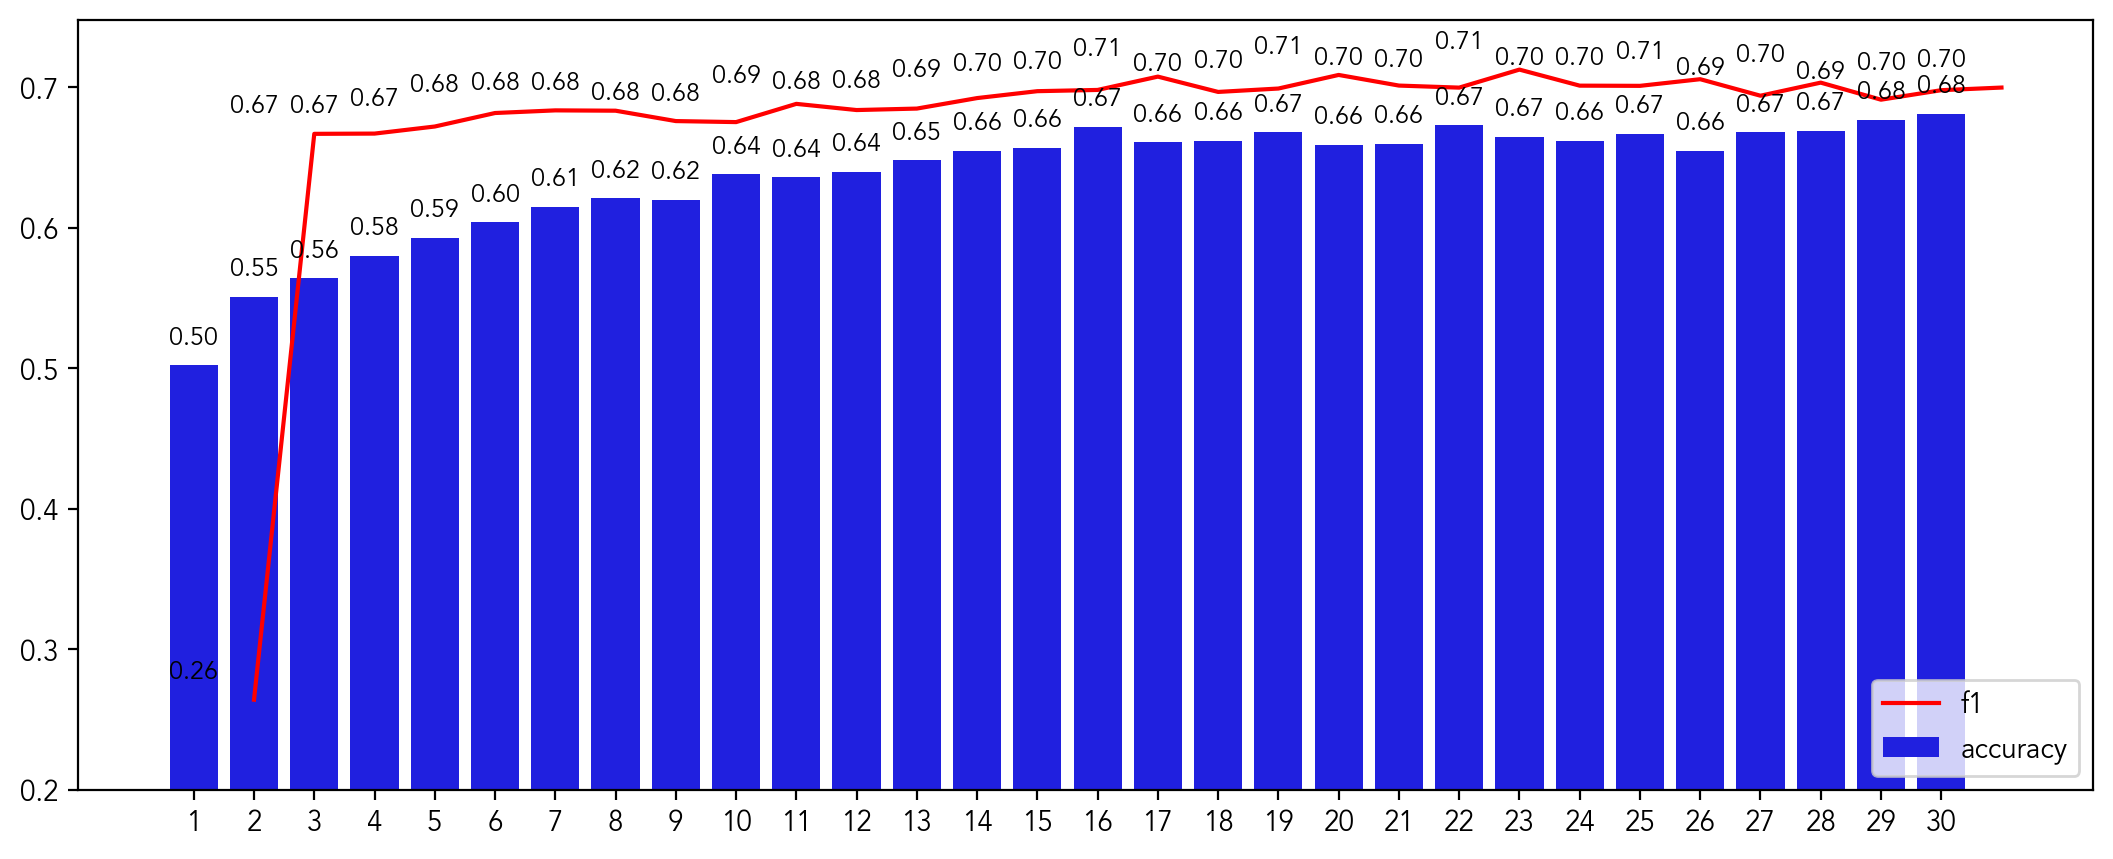

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.family'] = 'Avenir'

acc = []
f1 = []

for i in range(1, 31):
    vect = CountVectorizer(tokenizer = tokenizer.morphs, max_df = i)
    vectors = vect.fit_transform(df['document'])
    model = RandomForestClassifier(random_state=2022, n_jobs=-1)
    acc.append(cross_val_score(model, vectors, df['label'], scoring='accuracy', cv=5).mean())
    f1.append(cross_val_score(model, vectors, df['label'], scoring='f1', cv=5).mean())


fig, ax = plt.subplots(figsize=(13, 5))

sns.barplot(x = range(1, 31), y = acc, color='b', label='accuracy', ax=ax)
sns.lineplot(x = range(1, 31), y = f1, color='r', label='f1', ax=ax)

# Add labels for accuracy
for i, v in enumerate(acc):
    ax.text(i, v + 0.01, "{:.2f}".format(v), ha='center', va='bottom', fontsize=9)

# Add labels for f1 score
for i, v in enumerate(f1):
    ax.text(i, v + 0.01, "{:.2f}".format(v), ha='center', va='bottom', fontsize=9)

# Set y-axis limit
ax.set_ylim([0.2, None])

# Set legend position
ax.legend(loc='lower right')

In [100]:
df

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
995,10275296,미달이는.. 연예계를 바라보는 태도를 고쳐야 한다.,0
996,6473973,파괴된 관객들.,0
997,8417568,알콜중독자들 덕에 평점이 낮은가?,1
998,7126211,중견배우들이 만들어놓은 긴장감이 나름 긴장감있게 싸워보려했던 도술사들에 의해 헛웃음...,0


In [101]:
type(vect)

sklearn.feature_extraction.text.CountVectorizer

In [102]:
shape = vectors.shape
shape

(1000, 3543)